<center><img src="https://github.com/girishksahu/INSAID2021/blob/SMART_AI_Learning/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>ML Foundation Project - Churn Prediction for Telecom Service Provider</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2021/blob/ML-Foundation-Telecom-Churn/weconnect-logo.jpg?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Your client for this project is a Telecom Service Provider.

    - The company has started facing high churn rate due to rapid development in technology and the emerging new competitors in the market.

    - The objective is to use the model to take further actions for preventing customers to churn.

    - They will have to offer something to their customers so they stick around, example - a promo, discount, loyalty program etc..


**<h3>Current Scenario:</h3>**

- Till now they have been using traditional ways which now have become a problem to handle due to human interventions. 
- They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The current process suffers from the following problems:**
    - Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.

    - They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
    
    - It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.

- The company has hired you as a data science consultant.

<a name = Section21></a>
### **Your Role**

- You are given a dataset of past customers and their status (Churn: Yes or No).

- Your task is to build a classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: **Predict whether a customer will churn or not.**

- Machine Learning Task: **Classification.**

- Target Variable: **Churn (Yes / No)**
- Win Condition: **N/A (best possible model)**

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the Accuracy score.

<center><img src="https://github.com/girishksahu/INSAID2021/blob/ML-Foundation-Telecom-Churn/customer_churn.png?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [360]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [361]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.24.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **dataset** consists of all the necessary information about the customers like their Gender, MonthlyCharges, TotalCharges, PaymentMethod, InternetService, etc.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 5634 | 21 | 924.5 KB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **customerID**   | Customer Identity |
|02| **Gender**      | Whether the customer is a male or a female|
|03| **SeniorCitizen**        | Whether the customer is a senior citizen or not (1, 0)|
|04| **Partner**          | Whether the customer has a partner or not (Yes, No)|
|05| **Dependents**      | Whether the customer has dependents or not (Yes, No) |
|06| **Tenure**           | Number of months the customer has stayed with the company|
|07| **PhoneService**     | Whether the customer has a phone service or not (Yes, No)|
|08| **MultipleLines**        | Whether the customer has multiple lines or not (Yes, No, No phone service)  |
|09| **InternetService**          | Customer’s internet service provider (DSL, Fiber optic, No)       |
|10| **OnlineSecurity**         | Whether the customer has online security or not (Yes, No, No internet service)  |
|11| **OnlineBackup**     | Whether the customer has online backup or not (Yes, No, No internet service)  |
|12| **DeviceProtection**     | 	Whether the customer has device protection or not (Yes, No, No internet service)    |
|13| **TechSupport**     | Whether the customer has tech support or not (Yes, No, No internet service)     |
|14| **StreamingTV**     | Whether the customer has streaming TV or not (Yes, No, No internet service)           |
|15| **StreamingMovies**     | Whether the customer has streaming movies or not (Yes, No, No internet service)           |
|16| **Contract**     | The contract term of the customer (Month-to-month, One year, Two year)      |
|17| **PaperlessBilling**     | Whether the customer has paperless billing or not (Yes, No)                        |
|18| **PaymentMethod**     | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
|19| **MonthlyCharges**     | The amount charged to the customer monthly           |
|20| **TotalCharges**     | The total amount charged to the customer           |
|21| **Churn**     | Whether the customer churned or not (Yes or No)|

- The **Test dataset** consists of the information about customer and **Churn** need to be predicted which provides whether customer will churn or not (Yes/No).

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1409 | 20 | 220.3 KB | 

<br>

- Load WeConnect customer train dataset to be used for Training and Validation

In [362]:
# Load Churn_train.csv
churn_master_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021/ML-Foundation-Telecom-Churn/Churn_train.csv")

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', churn_master_data.shape)

# Output first 10 data rows
churn_master_data.head(10)


Shape of the Training and Validation dataset: (5634, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No
5,4765-OXPPD,Female,0,Yes,Yes,9,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Month-to-month,No,Mailed check,65.00,663.05,Yes
6,0742-LAFQK,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Electronic check,99.15,7422.1,No
7,5213-TWWJU,Male,0,No,No,28,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,No,Electronic check,91.00,2626.15,No
8,9957-YODKZ,Male,1,Yes,No,6,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.80,457.1,No
9,1732-VHUBQ,Female,1,Yes,Yes,47,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.55,3309.25,Yes


- Load WeConnect customer test dataset to be used for Prediction

In [363]:
# load Churn_test.csv
churn_test_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021/ML-Foundation-Telecom-Churn/Churn_test.csv")

# Get the dimesions of data
print('Shape of the Test dataset to be used for Prediction:', churn_test_data.shape)

# Output first 10 data rows
churn_test_data.head(10)

Shape of the Test dataset to be used for Prediction: (1409, 20)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05
5,7964-ZRKKG,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.3
6,1357-BIJKI,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.7
7,8720-RQSBJ,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.00,44
8,4682-BLBUC,Male,0,Yes,No,44,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45
9,8930-XOTDP,Female,0,Yes,Yes,18,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.8


In [364]:
# Check for any missing values
any(churn_master_data.isna().sum())

False

In [365]:
#check if any duplicate row
any(churn_master_data.duplicated())

False

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [366]:
#Basic statistical details for numeric variables
churn_master_data.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,5634.0,64.779127,30.104993,18.25,35.4,70.375,89.85,118.65


In [367]:
#Basic statistical details for numeric variables
churn_master_data.describe(include=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5634.0,0.161874,0.368368,0.0,0.0,0.0,0.0,1.0
tenure,5634.0,32.277955,24.555211,0.0,9.0,29.0,55.0,72.0


**Observations:**
- Total count for all numeric variables is same as 5634 which confirms that there are no missing values.
- Most of them have mean and median same which means normal distribution.

In [368]:
#Basic statistical details for categorical variables
churn_master_data.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,5634,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5291,2
top,9172-JITSM,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,19.65,No
freq,1,2838,2932,3968,5087,2700,2479,2801,2498,2473,2781,2246,2213,3104,3321,1893,8,4113


**Observations:**
- Total count for all categorical variables is same as 5634 which confirms that there are no missing values. 

In [369]:
churn_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [370]:
# Columns list can be handy and useful for further steps
churn_master_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [371]:
# Check column data types and any null values
churn_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [372]:
churn_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


**Observations:**

- Total Non-Null count for each column is same as 1409 which means there is no missing values.

In [373]:
# Get list of categorical variables
s = (churn_master_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [374]:
# Get list of numerical variables
s = (churn_master_data.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['MonthlyCharges']


In [375]:
# Get list of numerical variables
s = (churn_master_data.dtypes == 'int64')
numeric_int_cols = list(s[s].index)

print("Numeric variables Int:")
print(numeric_int_cols)

Numeric variables Int:
['SeniorCitizen', 'tenure']


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [376]:
profile = ProfileReport(df=churn_master_data)
profile.to_file(output_file='Telecom-Churn Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observations:**

- The report shows that there are a **total** of **21 features** out of which **2** are **numerical**, **14** is **categorical** and **5** are shown as **boolean**(categorical)

- **Churn** target categorical feature has imbalanced data with **4113** showing churn as No and **1521** showing churn as Yes.

- All the features has equal number of records **5634** which means there are no missing values.

- All the categorical feature has evenly distributed categorical data except SeniorCitizen and Dependents data.

- All the nuerical feature has evenly distributed numerical data.

- For detailed information, please check **Telecom-Churn Pre Profiling Report.html** file.

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are no missing values and data appears clean so far but we need to pre process few features before EDA and Model Evaluation

In [377]:
churn_master_data['TotalCharges'] = pd.to_numeric(churn_master_data['TotalCharges'], errors='coerce')

In [378]:
churn_test_data['TotalCharges'] = pd.to_numeric(churn_test_data['TotalCharges'], errors='coerce')

In [379]:
churn_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [380]:
churn_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [381]:
churn_master_data[churn_master_data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
899,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2224,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
2697,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
3054,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3488,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
4056,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
4761,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
5607,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No


In [382]:
churn_test_data[churn_test_data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
103,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
592,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
1327,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN


In [383]:
churn_master_data['TotalCharges'].fillna(value= churn_master_data['TotalCharges'].mean(), inplace=True)

In [384]:
churn_test_data['TotalCharges'].fillna(value= churn_test_data['TotalCharges'].mean(), inplace=True)

In [385]:
churn_master_data[churn_master_data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [386]:
churn_test_data[churn_test_data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [387]:
churn_master_data['SeniorCitizen']=churn_master_data['SeniorCitizen'].astype(dtype=np.object)

In [388]:
churn_test_data['SeniorCitizen']=churn_test_data['SeniorCitizen'].astype(dtype=np.object)

In [389]:
churn_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   object 
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [390]:
churn_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   object 
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [391]:
churn_master_data['TotalCharges'].describe()

count    5634.000000
mean     2280.662380
std      2264.784682
min        18.800000
25%       392.775000
50%      1397.100000
75%      3787.500000
max      8684.800000
Name: TotalCharges, dtype: float64

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

In [392]:
post_profile=ProfileReport(df=churn_master_data)
post_profile.to_file(output_file='Telecom-Churn Post Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observations:**

- Not Applicable

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the breakdown of Customers having Churn?**

In [393]:
churn_master_data['Churn'].value_counts()

No     4113
Yes    1521
Name: Churn, dtype: int64

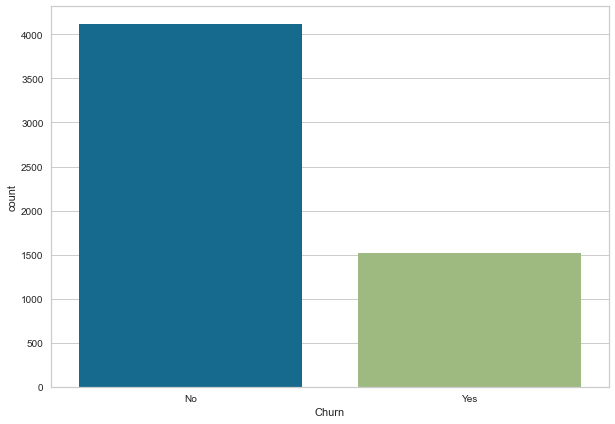

In [394]:
plt.figure(figsize=(10,7))
sns.countplot(x='Churn',data=churn_master_data,order=churn_master_data['Churn'].value_counts().index)
plt.show()

In [395]:
churn_master_data['gender'].value_counts()

Male      2838
Female    2796
Name: gender, dtype: int64

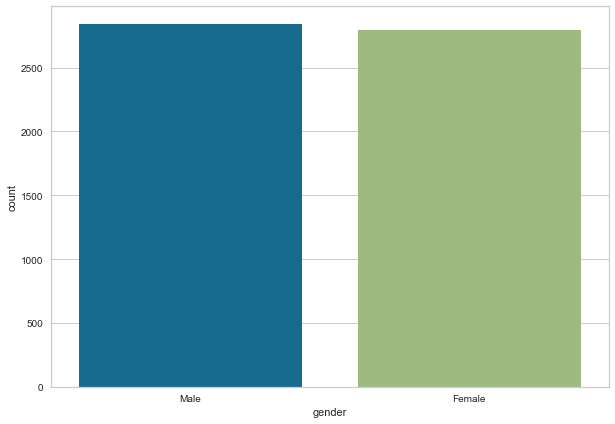

In [396]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',data=churn_master_data,order=churn_master_data['gender'].value_counts().index)
plt.show()

In [397]:
churn_master_data['SeniorCitizen'].value_counts()

0    4722
1     912
Name: SeniorCitizen, dtype: int64

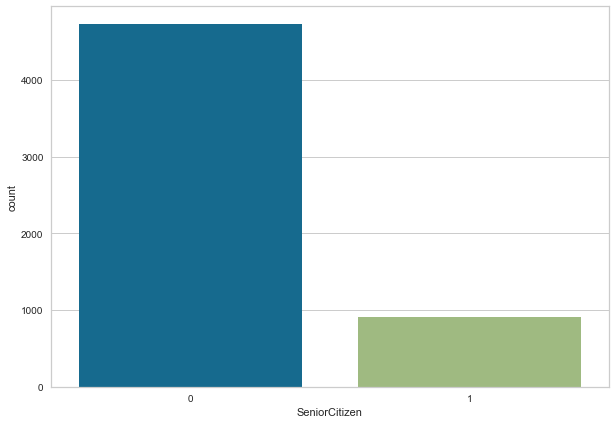

In [398]:
plt.figure(figsize=(10,7))
sns.countplot(x='SeniorCitizen',data=churn_master_data,order=churn_master_data['SeniorCitizen'].value_counts().index)
plt.show()

In [399]:
churn_master_data['Partner'].value_counts()

No     2932
Yes    2702
Name: Partner, dtype: int64

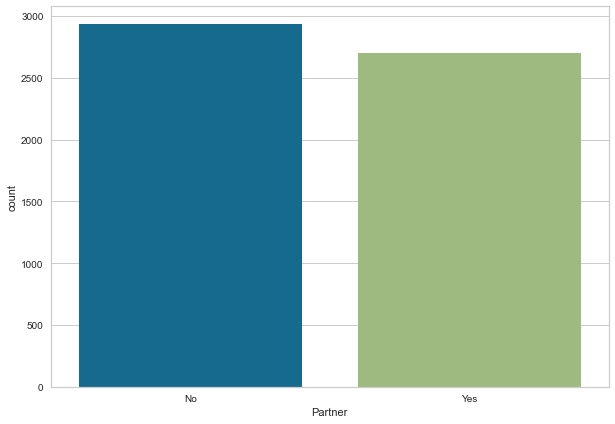

In [400]:
plt.figure(figsize=(10,7))
sns.countplot(x='Partner',data=churn_master_data,order=churn_master_data['Partner'].value_counts().index)
plt.show()

In [401]:
churn_master_data['Dependents'].value_counts()

No     3968
Yes    1666
Name: Dependents, dtype: int64

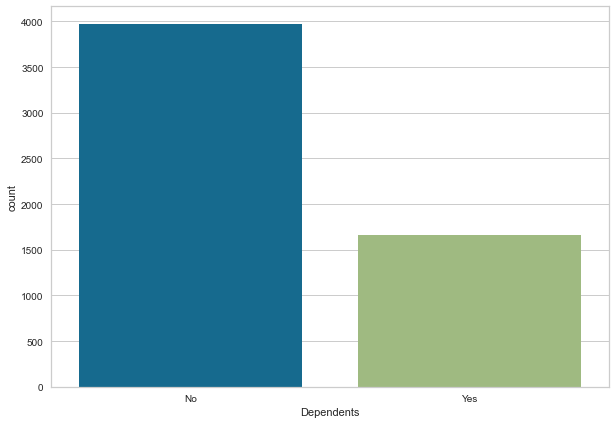

In [402]:
plt.figure(figsize=(10,7))
sns.countplot(x='Dependents',data=churn_master_data,order=churn_master_data['Dependents'].value_counts().index)
plt.show()

In [403]:
churn_master_data['PhoneService'].value_counts()

Yes    5087
No      547
Name: PhoneService, dtype: int64

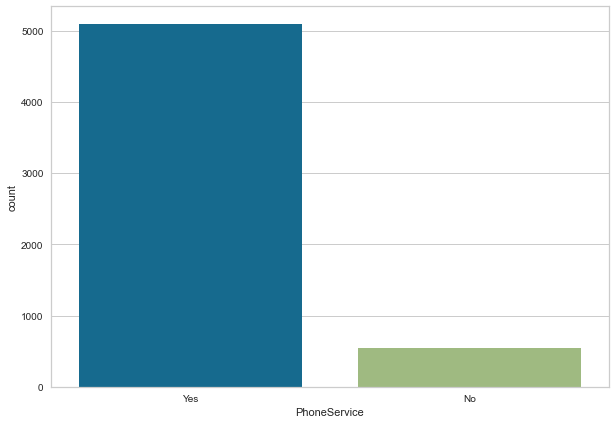

In [404]:
plt.figure(figsize=(10,7))
sns.countplot(x='PhoneService',data=churn_master_data,order=churn_master_data['PhoneService'].value_counts().index)
plt.show()

In [405]:
churn_master_data['MultipleLines'].value_counts()

No                  2700
Yes                 2387
No phone service     547
Name: MultipleLines, dtype: int64

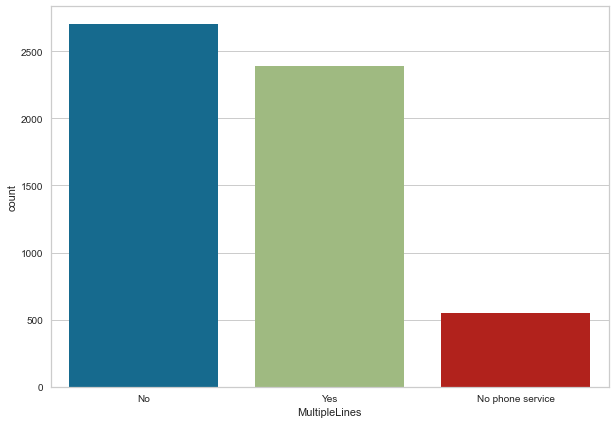

In [406]:
plt.figure(figsize=(10,7))
sns.countplot(x='MultipleLines',data=churn_master_data,order=churn_master_data['MultipleLines'].value_counts().index)
plt.show()

In [407]:
churn_master_data['InternetService'].value_counts()

Fiber optic    2479
DSL            1934
No             1221
Name: InternetService, dtype: int64

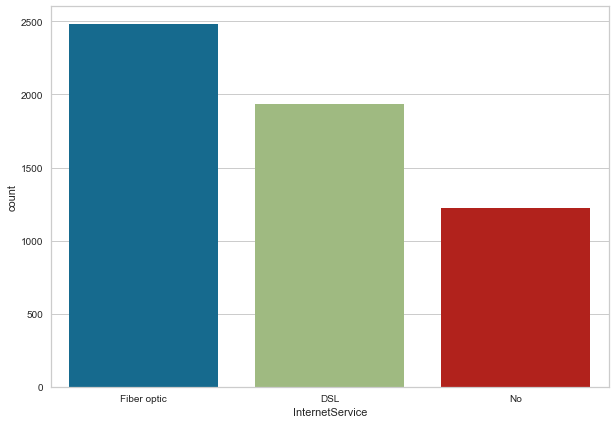

In [408]:
plt.figure(figsize=(10,7))
sns.countplot(x='InternetService',data=churn_master_data,order=churn_master_data['InternetService'].value_counts().index)
plt.show()

In [409]:
churn_master_data['OnlineSecurity'].value_counts()

No                     2801
Yes                    1612
No internet service    1221
Name: OnlineSecurity, dtype: int64

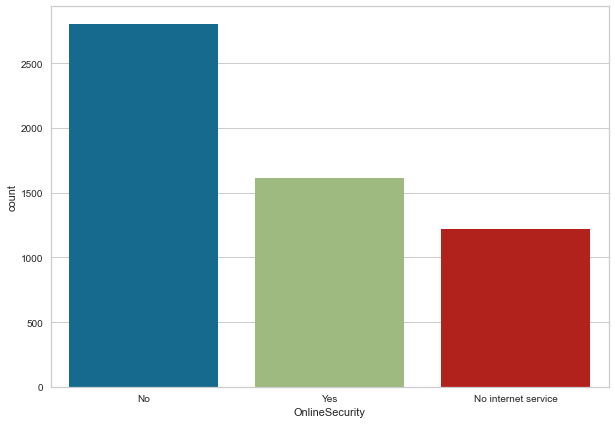

In [410]:
plt.figure(figsize=(10,7))
sns.countplot(x='OnlineSecurity',data=churn_master_data,order=churn_master_data['OnlineSecurity'].value_counts().index)
plt.show()

In [411]:
churn_master_data['OnlineBackup'].value_counts()

No                     2498
Yes                    1915
No internet service    1221
Name: OnlineBackup, dtype: int64

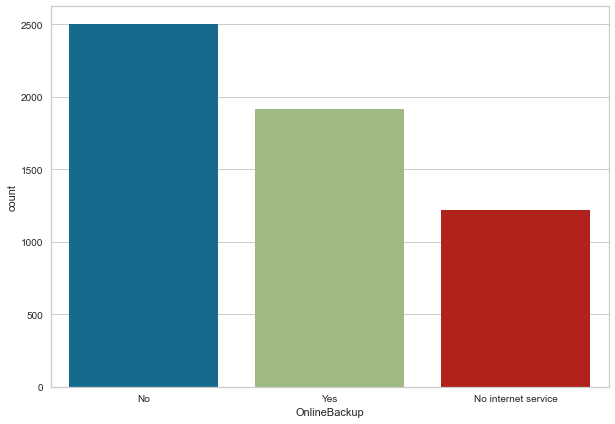

In [412]:
plt.figure(figsize=(10,7))
sns.countplot(x='OnlineBackup',data=churn_master_data,order=churn_master_data['OnlineBackup'].value_counts().index)
plt.show()

In [413]:
churn_master_data['DeviceProtection'].value_counts()

No                     2473
Yes                    1940
No internet service    1221
Name: DeviceProtection, dtype: int64

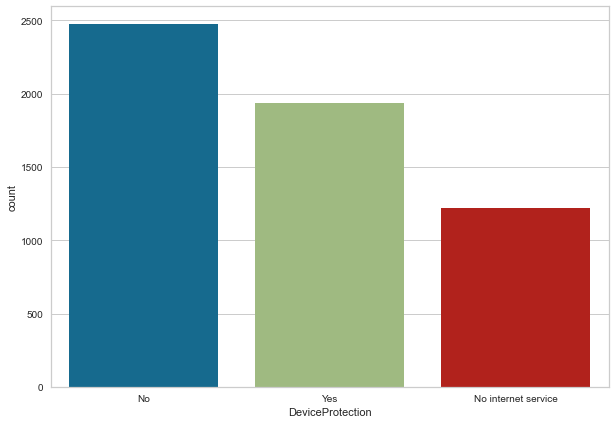

In [414]:
plt.figure(figsize=(10,7))
sns.countplot(x='DeviceProtection',data=churn_master_data,order=churn_master_data['DeviceProtection'].value_counts().index)
plt.show()

In [415]:
churn_master_data['TechSupport'].value_counts()

No                     2781
Yes                    1632
No internet service    1221
Name: TechSupport, dtype: int64

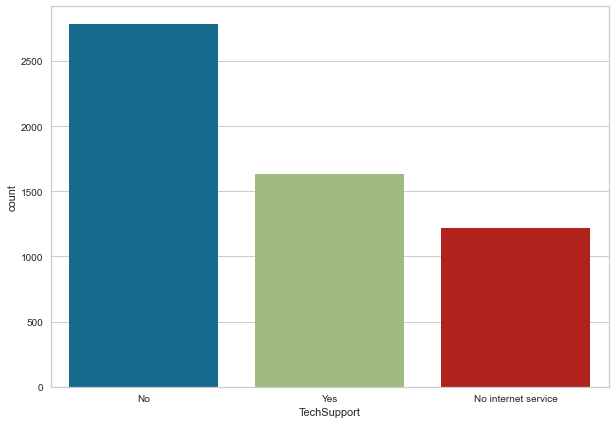

In [416]:
plt.figure(figsize=(10,7))
sns.countplot(x='TechSupport',data=churn_master_data,order=churn_master_data['TechSupport'].value_counts().index)
plt.show()

In [417]:
churn_master_data['StreamingTV'].value_counts()

No                     2246
Yes                    2167
No internet service    1221
Name: StreamingTV, dtype: int64

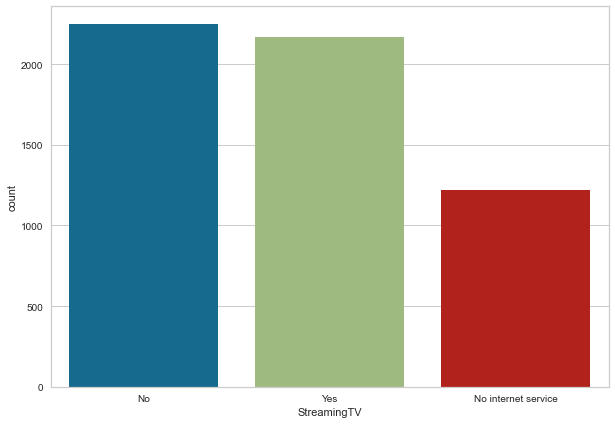

In [418]:
plt.figure(figsize=(10,7))
sns.countplot(x='StreamingTV',data=churn_master_data,order=churn_master_data['StreamingTV'].value_counts().index)
plt.show()

In [419]:
churn_master_data['StreamingMovies'].value_counts()

No                     2213
Yes                    2200
No internet service    1221
Name: StreamingMovies, dtype: int64

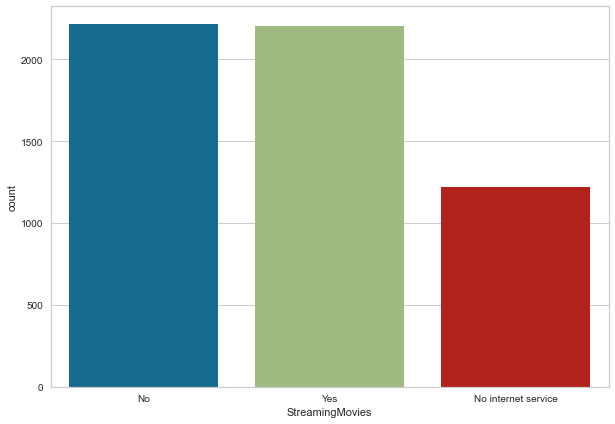

In [420]:
plt.figure(figsize=(10,7))
sns.countplot(x='StreamingMovies',data=churn_master_data,order=churn_master_data['StreamingMovies'].value_counts().index)
plt.show()

In [421]:
churn_master_data['Contract'].value_counts()

Month-to-month    3104
Two year          1344
One year          1186
Name: Contract, dtype: int64

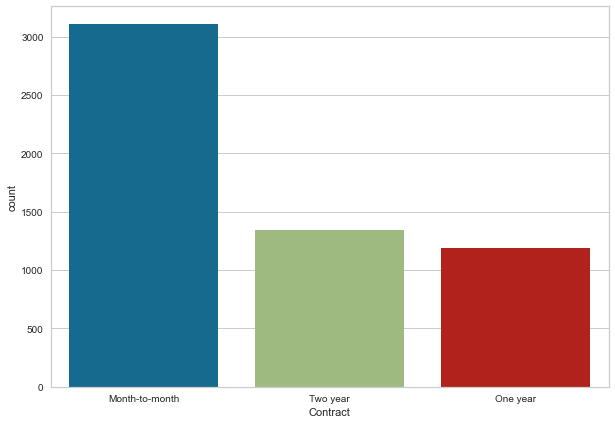

In [422]:
plt.figure(figsize=(10,7))
sns.countplot(x='Contract',data=churn_master_data,order=churn_master_data['Contract'].value_counts().index)
plt.show()

In [423]:
churn_master_data['PaperlessBilling'].value_counts()

Yes    3321
No     2313
Name: PaperlessBilling, dtype: int64

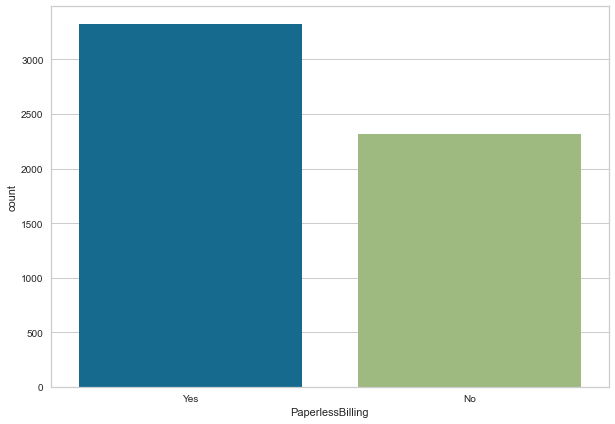

In [424]:
plt.figure(figsize=(10,7))
sns.countplot(x='PaperlessBilling',data=churn_master_data,order=churn_master_data['PaperlessBilling'].value_counts().index)
plt.show()

In [425]:
churn_master_data['PaymentMethod'].value_counts()

Electronic check             1893
Mailed check                 1305
Bank transfer (automatic)    1219
Credit card (automatic)      1217
Name: PaymentMethod, dtype: int64

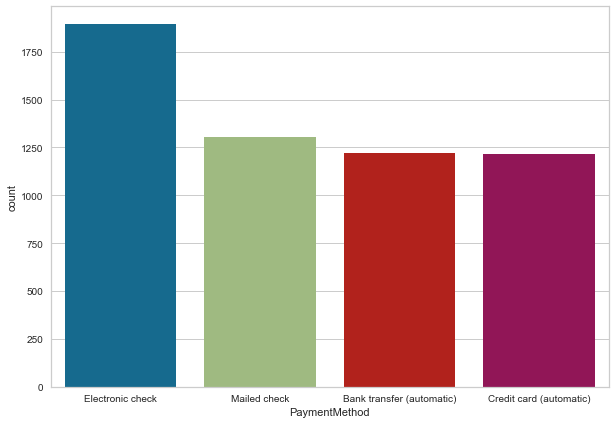

In [426]:
plt.figure(figsize=(10,7))
sns.countplot(x='PaymentMethod',data=churn_master_data,order=churn_master_data['PaymentMethod'].value_counts().index)
plt.show()

In [427]:
churn_master_data.groupby(by=['gender'], as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,gender,TotalCharges,MonthlyCharges,tenure
0,Female,1375.500,70.725,28
1,Male,1414.725,70.075,29


In [428]:
churn_master_data.groupby(by='SeniorCitizen', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,SeniorCitizen,TotalCharges,MonthlyCharges,tenure
0,0,1278.275,65.800,28
1,1,2276.025,84.925,31


In [429]:
churn_master_data.groupby(by='Partner', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,Partner,TotalCharges,MonthlyCharges,tenure
0,No,793.000,69.05,16
1,Yes,2356.625,74.75,46


In [430]:
churn_master_data.groupby(by='Dependents', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,Dependents,TotalCharges,MonthlyCharges,tenure
0,No,1327.500,74.075,25
1,Yes,1514.975,60.375,39


In [431]:
churn_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   object 
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [432]:
churn_master_data.groupby(by='PhoneService', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,PhoneService,TotalCharges,MonthlyCharges,tenure
0,No,1165.55,40.35,29
1,Yes,1416.50,74.75,29


In [433]:
churn_master_data.groupby(by='MultipleLines', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,MultipleLines,TotalCharges,MonthlyCharges,tenure
0,No,678.50,55.925,17
1,No phone service,1165.55,40.350,29
2,Yes,3252.00,88.000,45


In [434]:
churn_master_data.groupby(by='InternetService', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,InternetService,TotalCharges,MonthlyCharges,tenure
0,DSL,1565.80,56.25,29
1,Fiber optic,2710.25,91.65,30
2,No,520.55,20.15,25


In [435]:
churn_master_data.groupby(by='OnlineSecurity', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,OnlineSecurity,TotalCharges,MonthlyCharges,tenure
0,No,1370.350,79.30,19
1,No internet service,520.550,20.15,25
2,Yes,3688.175,80.00,50


In [436]:
churn_master_data.groupby(by='OnlineBackup', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,OnlineBackup,TotalCharges,MonthlyCharges,tenure
0,No,1112.575,74.80,17
1,No internet service,520.550,20.15,25
2,Yes,3902.600,86.10,50


In [437]:
churn_master_data.groupby(by='DeviceProtection', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,DeviceProtection,TotalCharges,MonthlyCharges,tenure
0,No,1120.300,73.850,16
1,No internet service,520.550,20.150,25
2,Yes,3953.075,88.975,48


In [438]:
churn_master_data.groupby(by='TechSupport', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,TechSupport,TotalCharges,MonthlyCharges,tenure
0,No,1345.55,77.950,19.0
1,No internet service,520.55,20.150,25.0
2,Yes,3725.75,81.675,49.5


In [439]:
churn_master_data.groupby(by='StreamingTV', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,StreamingTV,TotalCharges,MonthlyCharges,tenure
0,No,1096.625,69.675,18
1,No internet service,520.550,20.150,25
2,Yes,3706.950,93.300,44


In [440]:
churn_master_data.groupby(by='StreamingMovies', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,StreamingMovies,TotalCharges,MonthlyCharges,tenure
0,No,1096.250,69.60,18
1,No internet service,520.550,20.15,25
2,Yes,3678.025,92.75,45


In [441]:
churn_master_data.groupby(by='PaymentMethod', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,PaymentMethod,TotalCharges,MonthlyCharges,tenure
0,Bank transfer (automatic),2549.10,73.45,48
1,Credit card (automatic),2438.60,73.15,46
2,Electronic check,1221.65,80.60,18
3,Mailed check,467.15,33.75,15


In [442]:
churn_master_data.groupby(by='PaperlessBilling', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,PaperlessBilling,TotalCharges,MonthlyCharges,tenure
0,No,1047.7,50.15,28
1,Yes,1782.0,79.50,29


In [443]:
churn_master_data.groupby(by='Contract', as_index=False)['TotalCharges','MonthlyCharges','tenure'].median()

,Contract,TotalCharges,MonthlyCharges,tenure
0,Month-to-month,668.625,73.550,12
1,One year,2679.150,69.100,44
2,Two year,3585.575,64.175,64


<Figure size 3600x1800 with 0 Axes>

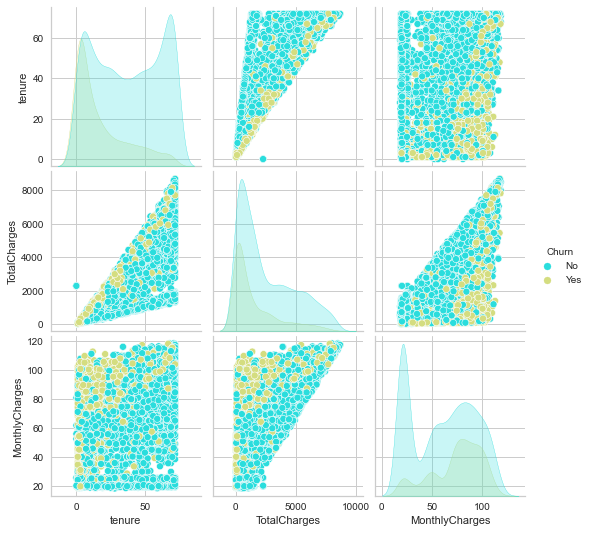

In [444]:
plt.figure(figsize=(50,25))
sns.pairplot(churn_master_data[['tenure','TotalCharges','MonthlyCharges','Churn']],palette='rainbow',diag_kind='kde',hue="Churn")
plt.show()

Text(0.5, 1.0, 'Correlation between Numerical features')

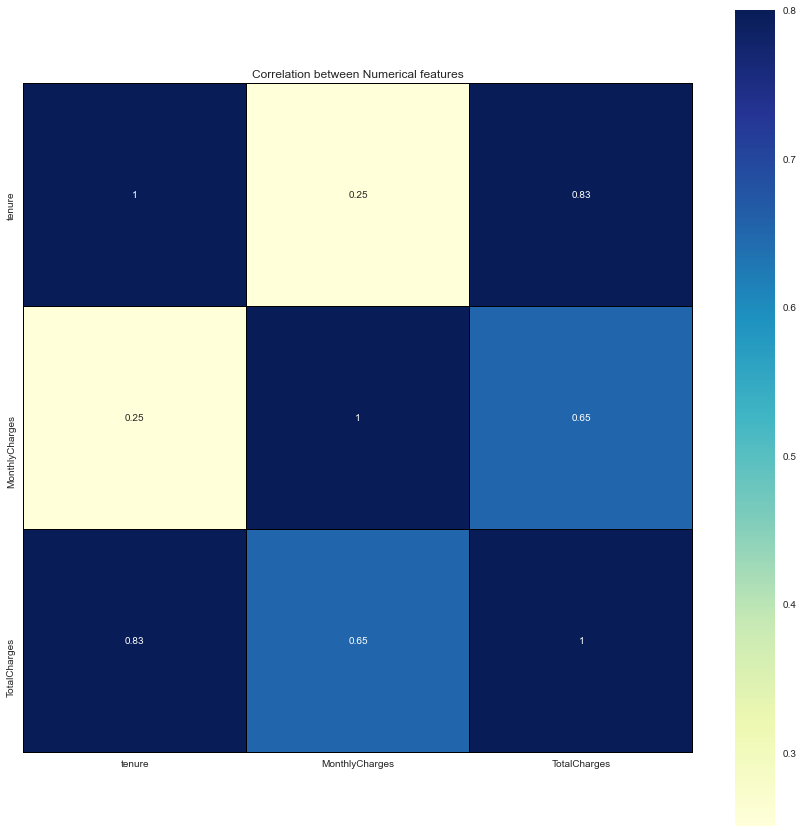

In [445]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = churn_master_data.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features')

In [446]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
churn_master_data.cov()

,tenure,MonthlyCharges,TotalCharges
tenure,602.958410,185.601249,4.599040e+04
MonthlyCharges,185.601249,906.310581,4.434085e+04
TotalCharges,45990.401499,44340.852128,5.129250e+06


<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [447]:
# need to drop customerID as it is not required for model evaluation
churn_master_data.drop(columns='customerID', inplace=True)

In [448]:
# separate target variable and drop from train dataset
y = churn_master_data['Churn']
churn_master_data.drop(columns='Churn', inplace=True)

In [449]:
# need to drop customerID for test dataset as well
churn_test_encoded= churn_test_data.drop(columns='customerID', inplace=False)

In [450]:
# Get list of categorical variables
s = (churn_master_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [451]:
# using get_dummies for One-Hot Encoding categorical variables
churn_encoded = pd.get_dummies(churn_master_data, columns=object_cols, drop_first=True)

In [452]:
# need to do same encoding for test dataset as well
churn_test_encoded = pd.get_dummies(churn_test_encoded, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [453]:
churn_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,12,19.70,258.35,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
1,42,73.90,3160.55,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
2,71,65.15,4681.75,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,71,85.45,6300.85,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0
4,30,70.40,2044.75,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [454]:
churn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 5634 non-null   int64  
 1   MonthlyCharges                         5634 non-null   float64
 2   TotalCharges                           5634 non-null   float64
 3   gender_Male                            5634 non-null   uint8  
 4   SeniorCitizen_1                        5634 non-null   uint8  
 5   Partner_Yes                            5634 non-null   uint8  
 6   Dependents_Yes                         5634 non-null   uint8  
 7   PhoneService_Yes                       5634 non-null   uint8  
 8   MultipleLines_No phone service         5634 non-null   uint8  
 9   MultipleLines_Yes                      5634 non-null   uint8  
 10  InternetService_Fiber optic            5634 non-null   uint8  
 11  Inte

In [455]:
churn_test_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,41,79.85,3320.75,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0
1,66,102.40,6471.85,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0
2,12,45.00,524.35,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,5,50.60,249.95,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,10,65.90,660.05,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1


In [456]:
churn_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 1409 non-null   int64  
 1   MonthlyCharges                         1409 non-null   float64
 2   TotalCharges                           1409 non-null   float64
 3   gender_Male                            1409 non-null   uint8  
 4   SeniorCitizen_1                        1409 non-null   uint8  
 5   Partner_Yes                            1409 non-null   uint8  
 6   Dependents_Yes                         1409 non-null   uint8  
 7   PhoneService_Yes                       1409 non-null   uint8  
 8   MultipleLines_No phone service         1409 non-null   uint8  
 9   MultipleLines_Yes                      1409 non-null   uint8  
 10  InternetService_Fiber optic            1409 non-null   uint8  
 11  Inte

Text(0.5, 1.0, 'Correlation between Numerical features')

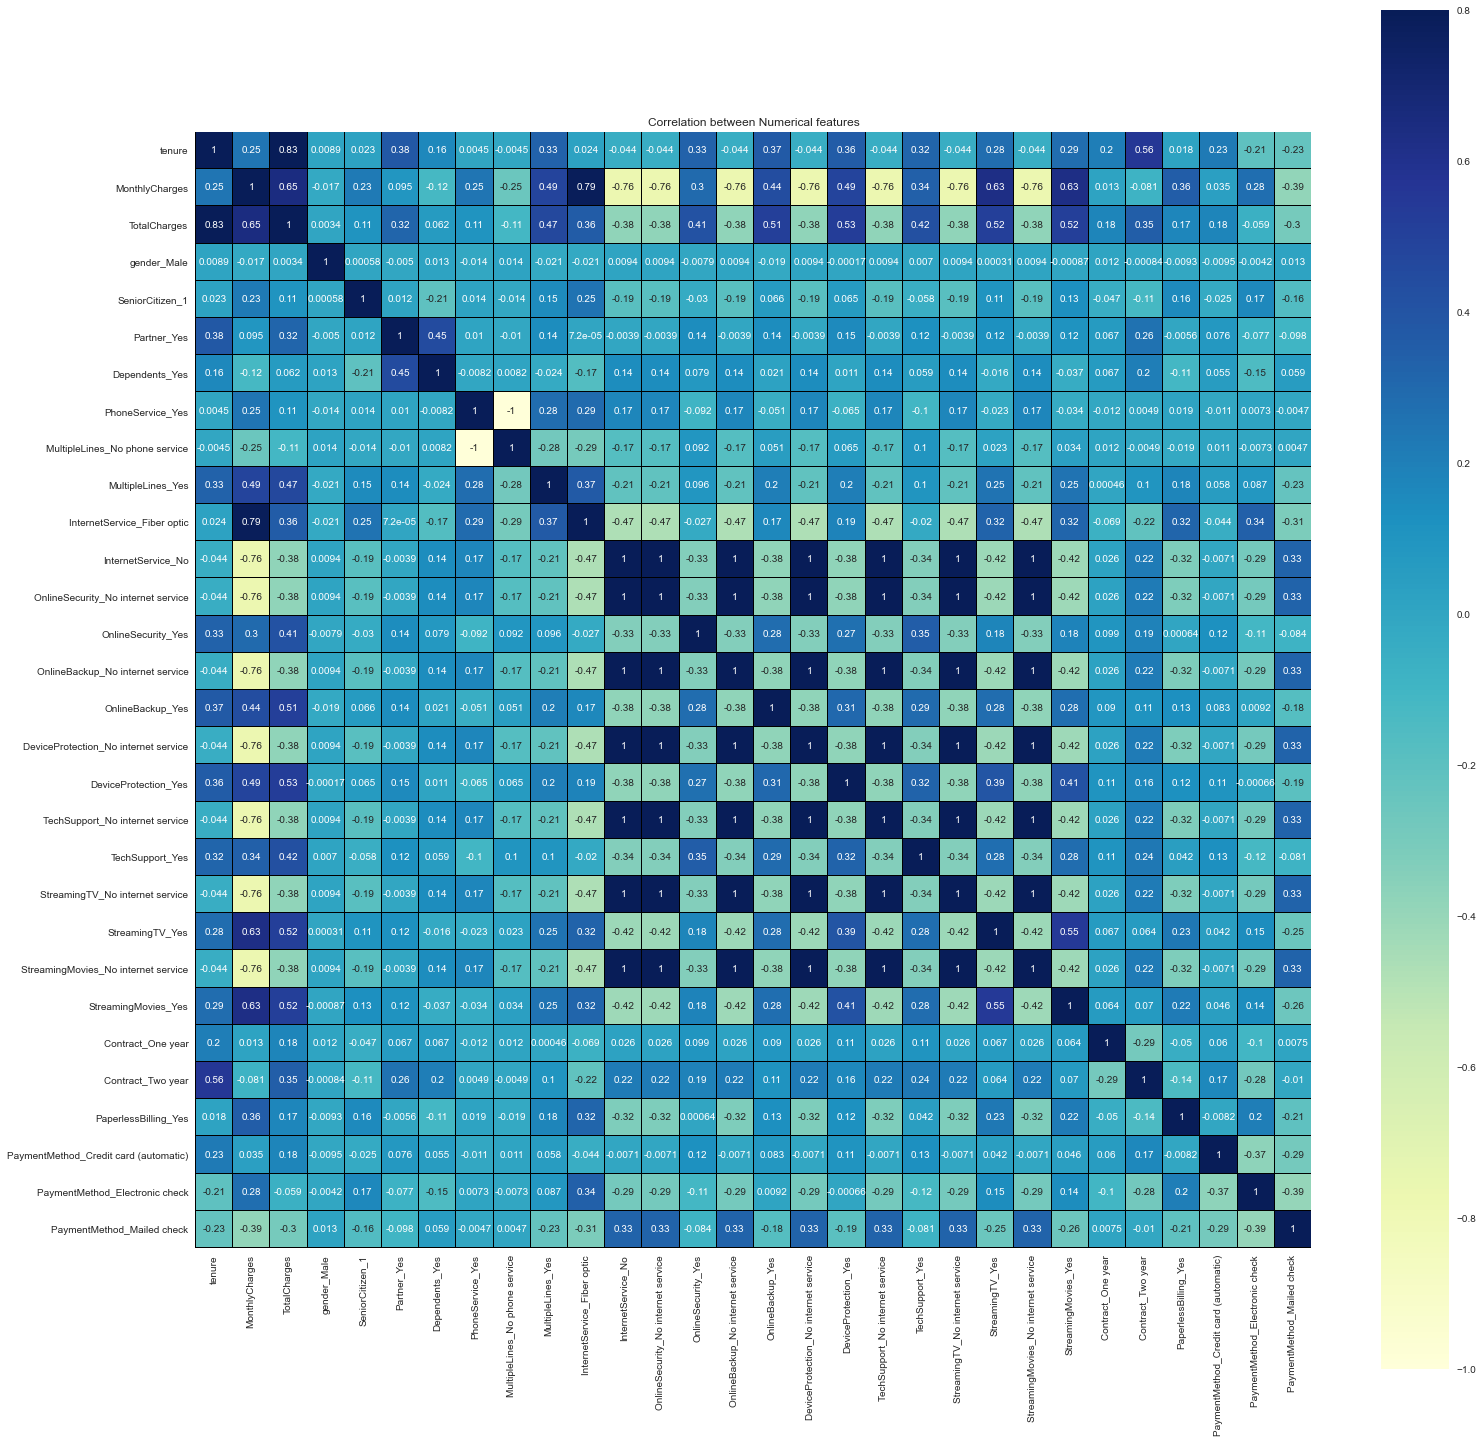

In [457]:
corr = churn_encoded.corr(method='pearson')
plt.figure(figsize=(25,25))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features')

**Observations:**

- There appears to be strong positive correlation between **tenure** and **TotalCharges**
- There appears to be positive correlation between **MonthlyCharges** and **StreamingMovies**
- There appears to be positive correlation between **MonthlyCharges** and **StreamingTV**
- There appears to be strong positive correlation between **MonthlyCharges** and **InternetService_Fiber Optic** 
- There appears to be higher positive correlation between **MonthlyCharges** and **TotalCharges**

In [458]:
#churn_encoded['Churn_Yes'].value_counts()

In [459]:
# # separate target variable and drop from train dataset
# y = churn_encoded['Churn_Yes']
# churn_encoded.drop(columns='Churn_Yes', inplace=True)

In [460]:
churn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 5634 non-null   int64  
 1   MonthlyCharges                         5634 non-null   float64
 2   TotalCharges                           5634 non-null   float64
 3   gender_Male                            5634 non-null   uint8  
 4   SeniorCitizen_1                        5634 non-null   uint8  
 5   Partner_Yes                            5634 non-null   uint8  
 6   Dependents_Yes                         5634 non-null   uint8  
 7   PhoneService_Yes                       5634 non-null   uint8  
 8   MultipleLines_No phone service         5634 non-null   uint8  
 9   MultipleLines_Yes                      5634 non-null   uint8  
 10  InternetService_Fiber optic            5634 non-null   uint8  
 11  Inte

We will try to see which feature are more important using RandomForestClassifier

In [461]:
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier   

feature_select = churn_encoded
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(feature_select, y)

# Extracting list of important features
selected_feat = feature_select.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 5
Threshold set by Model: 0.03
Features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check']


**Visualization of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

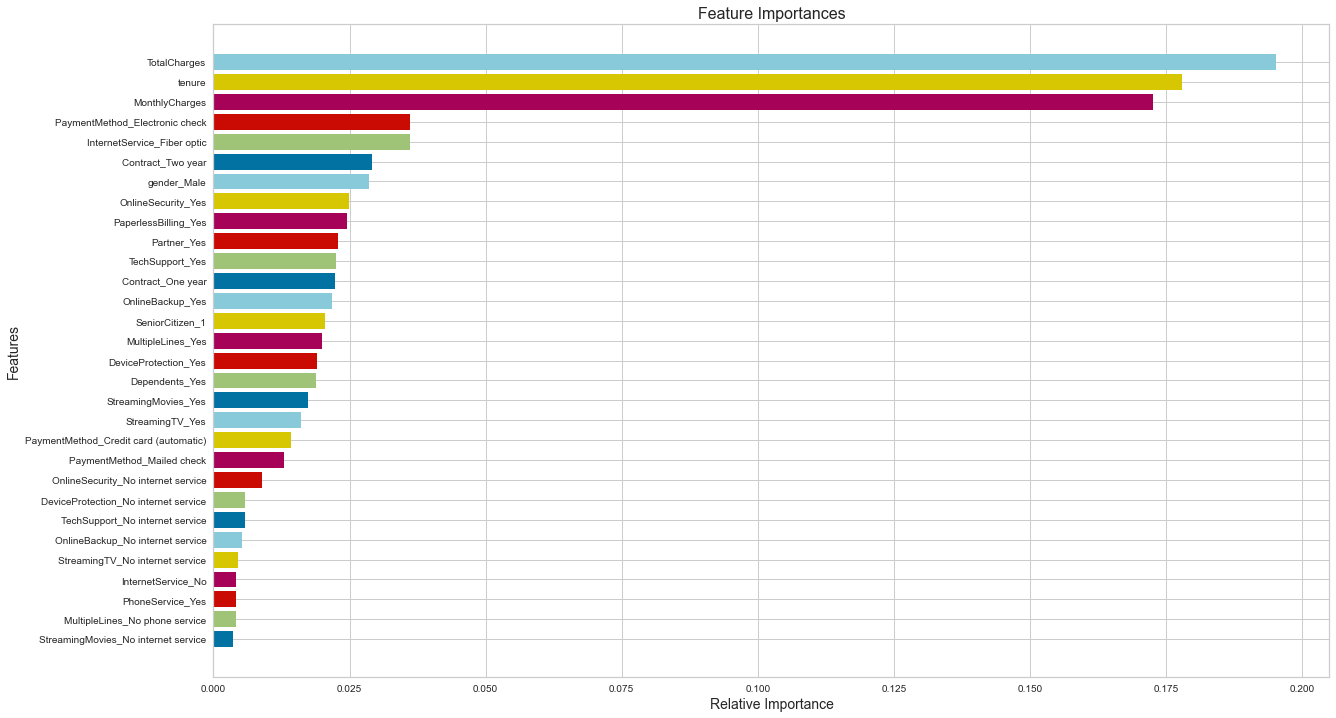

In [462]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(feature_select, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [464]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(churn_encoded, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (4225, 30)
y_train shape:  (4225,)
X_test shape:  (1409, 30)
y_test shape:  (1409,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 3892 to 4200
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4225 non-null   int64  
 1   MonthlyCharges                         4225 non-null   float64
 2   TotalCharges                           4225 non-null   float64
 3   gender_Male                            4225 non-null   uint8  
 4   SeniorCitizen_1                        4225 non-null   uint8  
 5   Partner_Yes                            4225 non-null   uint8  
 6   Dependents_Yes                         4225 non-null   uint8  
 7   PhoneService_Yes                       4225 non-null   uint8  
 8   MultipleLines_No phone service         4225 non-null   uint8  
 9   MultipleLines_Yes                    

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3892,63,19.50,1215.10,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
3546,1,20.10,20.10,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
4655,56,111.95,6418.90,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0
4302,57,58.75,3437.45,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0
1710,65,70.95,4555.20,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


<a name = Section73></a>
### **7.3 Data Scaling**

- Trying to evaluate model without any scaling of data.

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

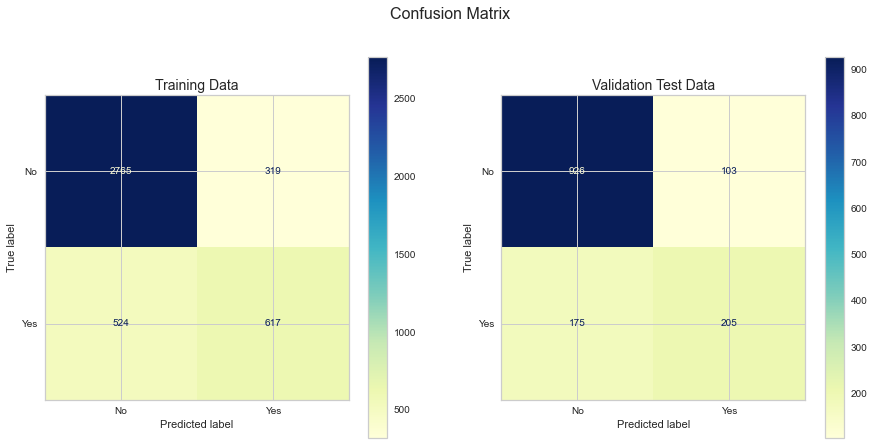

In [465]:
# Instantiate a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [466]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred_count))
confusion_matrix.index = ['Actual Churn No','Actual Churn Yes']
confusion_matrix.columns = ['Predicted Churn No','Predicted Churn Yes']
print(confusion_matrix)

                  Predicted Churn No  Predicted Churn Yes
Actual Churn No                  926                  103
Actual Churn Yes                 175                  205


In [467]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count))

Accuracy score for test validation data is: 0.8026969481902059


In [468]:
# K Fold
kf = KFold(shuffle=True, n_splits=5)
cv_results_kfold = cross_val_score(logreg,X_train, y_train, cv=kf, scoring='accuracy')
print(cv_results_kfold)

# Stratified K fold

skf = StratifiedKFold(shuffle=True, n_splits=5)
cv_results_skfold = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='accuracy')
print(cv_results_skfold)

[0.79881657 0.79408284 0.80118343 0.79289941 0.79408284]
[0.80473373 0.8        0.79881657 0.78698225 0.7964497 ]


In [469]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)

                    Training Data Report          
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      3084
         Yes       0.66      0.54      0.59      1141

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.79      0.80      0.79      4225

                    Test Validation Data Report           
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1029
         Yes       0.67      0.54      0.60       380

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



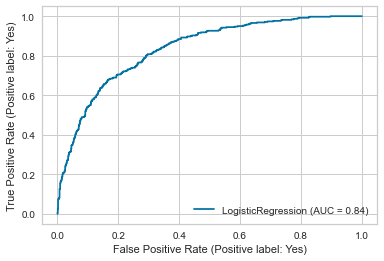

In [470]:
 roc_disp= plot_roc_curve(logreg, X_test, y_test)

In [471]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred = logreg.predict(churn_test_encoded)
y_test_pred
#print (y_test_pred.shape)
#print (y_test_pred)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 

In [472]:
output = pd.DataFrame({'customerID': churn_test_data.customerID,'Churn': y_test_pred})
output.to_csv('telecom-churn-submission1.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Model with best Accuracy score was used for model evaluation and prediction considering this is ML Foundation project.
- Accuracy Score was used to arrive at model evaluation which indicates good score for Test Validation data used.
- Correlation Heatmap shows linear relationship between Numeric features.